<a href="https://colab.research.google.com/github/divyasri770/IPL-DATA/blob/main/Copy_of_ngrok_fast_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets tqdm pandas matplotlib langchain sentence_transformers faiss-gpu langchain-community torch accelerate

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install fastapi uvicorn pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.9 MB/s eta 0:00:00


In [ ]:

import pandas as pd
from tqdm.notebook import tqdm
from datasets import Dataset
import matplotlib.pyplot as plt
from langchain.docstore.document import Document as LangchainDocument
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

In [ ]:

# Set display option for pandas
pd.set_option("display.max_colwidth", None)

# Open and read the first file
with open("/content/match_summaries_sentences.txt", "r") as fp1:
    content1 = fp1.read()

# Open and read the second file
with open("/content/iplteams.txt", "r") as fp2:
    content2 = fp2.read()

# Open and read the second file
with open("/content/Players_info.txt", "r") as fp3:
    content3 = fp3.read()

# Combine contents of both files, separated by three newlines
combined_content = content1 + "\n\n\n" + content2 + "\n\n\n" + content3

# Split the combined content into sections
s = combined_content.split("\n\n\n")

# Print the first section and the number of sections
print(s[0])
print(len(s))

# Create a RAW_KNOWLEDGE_BASE using LangchainDocument
RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=doc)
    for doc in tqdm(s)
]


On 2008-04-18, at M Chinnaswamy Stadium, the match between Royal Challengers Bangalore vs Kolkata Knight Riders took place. The toss was won by Royal Challengers Bangalore who decided to field. The match was won by Kolkata Knight Riders by runs with a margin of 140.0 runs/wickets. The first innings score was 222 and the second innings score was 82.0. The Player of the Match was BB McCullum. The umpires for the match were Asad Rauf, RE Koertzen, and J Srinath. Scores during the powerplay were 61, during the middle overs were 97, and during the death overs were 64.
---
On 2008-04-19, at Punjab Cricket Association Stadium, Mohali, the match between Kings XI Punjab vs Chennai Super Kings took place. The toss was won by Chennai Super Kings who decided to bat. The match was won by Chennai Super Kings by runs with a margin of 33.0 runs/wickets. The first innings score was 240 and the second innings score was 207.0. The Player of the Match was MEK Hussey. The umpires for the match were MR Bens

  0%|          | 0/36 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

  0%|          | 0/1526 [00:00<?, ?it/s]

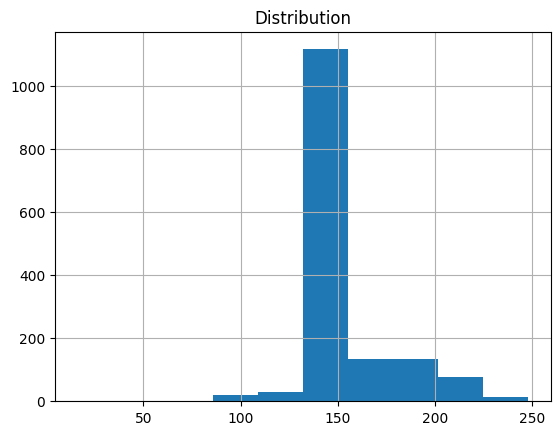

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer

MARKDOWN_SEPARATORS = [
    "\n#{1,6}",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n__+\n",
    "\n\n",
    "\n",
    " ",
    ""
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

fig = pd.Series(lengths).hist()
fig.set_title("Histogram of Document Lengths")
plt.title("Distribution")
plt.show()


In [ ]:
from typing import Optional, List
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"

def split_documents(
        chunk_size: int,
        knowledge_base: list[LangchainDocument],
        tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )
    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(512, RAW_KNOWLEDGE_BASE, tokenizer_name=EMBEDDING_MODEL_NAME)
print(len(docs_processed))
print(docs_processed[0:3])


549
[Document(metadata={'start_index': 0}, page_content='On 2008-04-18, at M Chinnaswamy Stadium, the match between Royal Challengers Bangalore vs Kolkata Knight Riders took place. The toss was won by Royal Challengers Bangalore who decided to field. The match was won by Kolkata Knight Riders by runs with a margin of 140.0 runs/wickets. The first innings score was 222 and the second innings score was 82.0. The Player of the Match was BB McCullum. The umpires for the match were Asad Rauf, RE Koertzen, and J Srinath. Scores during the powerplay were 61, during the middle overs were 97, and during the death overs were 64.\n---\nOn 2008-04-19, at Punjab Cricket Association Stadium, Mohali, the match between Kings XI Punjab vs Chennai Super Kings took place. The toss was won by Chennai Super Kings who decided to bat. The match was won by Chennai Super Kings by runs with a margin of 33.0 runs/wickets. The first innings score was 240 and the second innings score was 207.0. The Player of the M

In [ ]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

print(torch.cuda.is_available())

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed,
    embedding_model,
    distance_strategy=DistanceStrategy.COSINE,
)


True


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}


config.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
prompt_chat=[
    {
        "role":"system",
        "content":"""Using the information contained in the context,
Give a comprehensive answer to the question.
Respond only to the question asked , response should be concise and relevant to the question.
provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer""",

    },
    {
        "role":"user",
        "content":"""Context:
{context}
---
Now here is the Question you need to answer.
Question:{question}
        """,
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_chat,tokenize = False,add_generation_prompt=True,

)
print(RAG_PROMPT_TEMPLATE)

<|system|>
Using the information contained in the context,
Give a comprehensive answer to the question.
Respond only to the question asked , response should be concise and relevant to the question.
provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer<|end|>
<|user|>
Context:
{context}
---
Now here is the Question you need to answer.
Question:{question}
        <|end|>
<|assistant|>



In [ ]:
# give the match summary between punjab kings  and  chennai super kings on 2024-05-01
u_query = "give the match summary between Mumbai Indians and Rajasthan Royals  on 2009-05-14"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


YOUR QUESTION:
 give the match summary between Mumbai Indians and Rajasthan Royals  on 2009-05-14 

MICROSOFT 128K ANSWER: 
  On 2009-05-14, the match between Mumbai Indians and Rajasthan Royals took place at Kingsmead. Rajasthan Royals won the toss and decided to bat. They won the match by 2.0 runs/wickets with a first innings score of 145 and a second innings score of 143.0. SK Warne was named the Player of the Match. The umpires were BR Doctrove, DJ Harper, and D Govindjee. During the powerplay, the score was 42, in the middle overs it was 84, and in the death overs, it was 19.


In [ ]:
!ngrok config add-authtoken 2iowF9FTIrO9t96pXgXwZ5OMhYZ_2bMJ6rGaMuEGgGq2iS7nF

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from pyngrok import ngrok
import uvicorn
import nest_asyncio

# Initialize FastAPI app
app = FastAPI()

# Set up CORS middleware to allow all origins for development purposes
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allows all origins
    allow_credentials=True,
    allow_methods=["*"],  # Allows all methods
    allow_headers=["*"],  # Allows all headers
)

class QueryModel(BaseModel):
    query: str


@app.post("/query")
async def query_api(request: QueryModel):
    u_query = request.query
    retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query, k=3)
    context = retrieved_docs[0].page_content
    final_prompt = RAG_PROMPT_TEMPLATE.format(
        question=u_query, context=context
    )
    output = pipe(final_prompt, **generation_args)
    return {"question": u_query, "answer": output[0]['generated_text']}

In [ ]:
from pyngrok import ngrok
import uvicorn
import nest_asyncio

# Necessary to run uvicorn in Jupyter notebook
nest_asyncio.apply()

# Start ngrok tunnel
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

# Start FastAPI app
uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [482]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://c45e-34-143-166-154.ngrok-free.app" -> "http://localhost:8000"
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "OPTIONS /query HTTP/1.1" 200 OK
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "POST /query HTTP/1.1" 200 OK
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "POST /query HTTP/1.1" 200 OK
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "OPTIONS /query HTTP/1.1" 200 OK
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "POST /query HTTP/1.1" 200 OK
INFO:     49.43.231.192:0 - "OPTIONS /query HTTP/1.1" 200 OK
INFO:     49.43.231.192:0 - "POST /query HTTP/1.1" 200 OK
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "POST /query HTTP/1.1" 200 OK
INFO:     2405:201:c00e:69b9:c8a4:de36:7d5f:ab14:0 - "POST /query HTTP/1.1" 200 OK
